# Numerical Modelling - a coffee cup example

## Objectives

- Understanding that physical laws can be expressed as mathematical equatiions
- Solving an Ordinary Differential Equation (ODE) using [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

## Resources

- [Ordinary Differential Equation](https://en.wikipedia.org/wiki/Ordinary_differential_equation)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Coffee cup example

$$
\frac{dT_\text{coffee}}{dt} = -k (T_\text{coffee} - T_\text{room})
$$

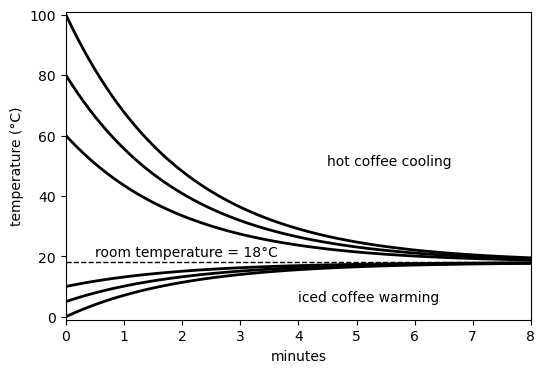

In [2]:
dt = 0.1 # time step (in minutes)
max_time = 8 # time to run (in minutes)
time = np.arange(0,max_time+dt,dt)

# define or differential equation
def dTdt(T_coffee, t, k, T_room):
    return -k*(T_coffee-T_room)

# plotting coffee temperatures
fig, ax = plt.subplots(1,1,figsize=(6,4))

T_room = 18 # room temperature
k = 0.5 # (thermal) diffusion coeffcicient

ax.axhline(T_room,ls='--',color='k',lw=1)

for T0_coffee in [100,80,60,0,5,10]:
    sol_T = odeint(dTdt, T0_coffee, time, (k, T_room))
    ax.plot(time,sol_T,'k-',lw=2)
ax.set_ylim(-1,101)
ax.set_xlim(0,max_time)
ax.set_ylabel("temperature (°C)")
ax.set_xlabel("minutes");
ax.text(0.5,T_room+2,f"room temperature = {T_room}°C")
ax.text(4.5,50,"hot coffee cooling")
ax.text(4.,5,"iced coffee warming");

**Questions**

1. What happens when you change $k$ (e.g., to 0, or negative)? Or $T_\text{room}$?
2. Can you color the "hot coffee cooling" lines red, and the "iced coffee warming" lines "blue"? 